# **Maestria en Ingenieria Economica - Universidad Nacional de Ingenieria**

---

### Curso: _Macroeconomia_

### Profesor (_TA_): _Rodney Menezes_ 

### Tema: _Modelo Consumo de Torta con Depreciacion Estocastica - Bellman_

### Fecha: _22/12/2023_

---


Para resolver el modelo de Consumo de Torta Estocástico mediante el método de Value Function Iteration (VFI), primero vamos a establecer la ecuación de Bellman. El modelo es un caso clásico de un problema de optimización dinámica bajo incertidumbre.

La ecuación de Bellman para este problema se puede escribir como:

$$V(k_t,\theta_t) = \max_{C_t} \left\{ \ln(C_t) + \beta E_t[V(k_{t+1})] \right\}$$

Sujeto a:

$$k_{t+1} = (1 - \theta_t) k_t$$

$$\theta_t \sim \text{Uniforme} \in [0,1]$$


Donde $V(k_t, \theta_t)$ es la función de valor, $\beta$ es el factor de descuento, $C_t$ es el consumo en el tiempo $t$, $k_{t+1}$  es el capital en el tiempo $t+1$, y $\theta_t$ es el término estocástico que afecta a la depreciacion de la torta.

Para implementar el VFI, seguiremos estos pasos:

- Inicializar una función de valor arbitraria, por ejemplo, $V_0(k_t, \theta_t) = 0$ para todos los $k$ y $\theta$
- Resolver el problema de maximización en la ecuación de Bellman para encontrar la función de política óptima.
- Actualizar la función de valor con el resultado del paso 2.
- Repetir los pasos 2 y 3 hasta que la función de valor converja.

In [21]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Parámetros del modelo
beta = 0.95           # Factor de descuento
num_k = 10            # Número de puntos en la grilla de capital
k_min = 0.1           # Capital mínimo
k_max = 1             # Capital máximo
k_grid = np.linspace(k_min, k_max, num_k)

# Simulación de shocks de depreciación
num_theta = 1
theta_grid = np.linspace(0, 1, num_theta)

# Función de utilidad
def utility(c):
    return np.log(c)

# Función de valor inicial
V_initial = np.zeros((num_k, num_theta))

# Precisión para la convergencia
tolerance = 1e-4
difference = 1

# Value Function Iteration
while difference > tolerance:
    V_new = np.zeros_like(V_initial)
    for i, k in enumerate(k_grid):
        for j, theta in enumerate(theta_grid):
            def objective(C):
                K_next = (1 - theta) * k
                if C <= 0 or K_next < 0 or C > k:
                    return -np.inf
                interp_func = interp1d(k_grid, V_initial[:, j], kind='linear', fill_value="extrapolate")
                V_next = np.mean(interp_func(K_next))
                return -(utility(C) + beta * V_next)

            result = minimize_scalar(objective, bounds=(0, k), method='bounded')
            V_new[i, j] = -result.fun

    difference = np.max(np.abs(V_new - V_initial))
    V_initial = np.copy(V_new)

# Calcular la función de política
policy_function = np.zeros_like(V_initial)
for i, k in enumerate(k_grid):
    for j, theta in enumerate(theta_grid):
        policy_function[i, j] = minimize_scalar(lambda C: -objective(C), bounds=(0, k), method='bounded').x

# Resultados
print("Función de Valor Final:\n", V_initial)
print("Función de Política Óptima:\n", policy_function)


Función de Valor Final:
 [[-4.60511412e+01]
 [-3.21879257e+01]
 [-2.40787541e+01]
 [-1.83253775e+01]
 [-1.38625553e+01]
 [-1.02162877e+01]
 [-7.13330459e+00]
 [-4.46279783e+00]
 [-2.10724268e+00]
 [-1.19212701e-04]]
Función de Política Óptima:
 [[6.61069614e-06]
 [4.83793635e-06]
 [4.24185026e-06]
 [6.24229467e-06]
 [4.46953488e-06]
 [5.78692541e-06]
 [3.41807954e-06]
 [4.38256709e-06]
 [5.34705465e-06]
 [5.96086099e-06]]


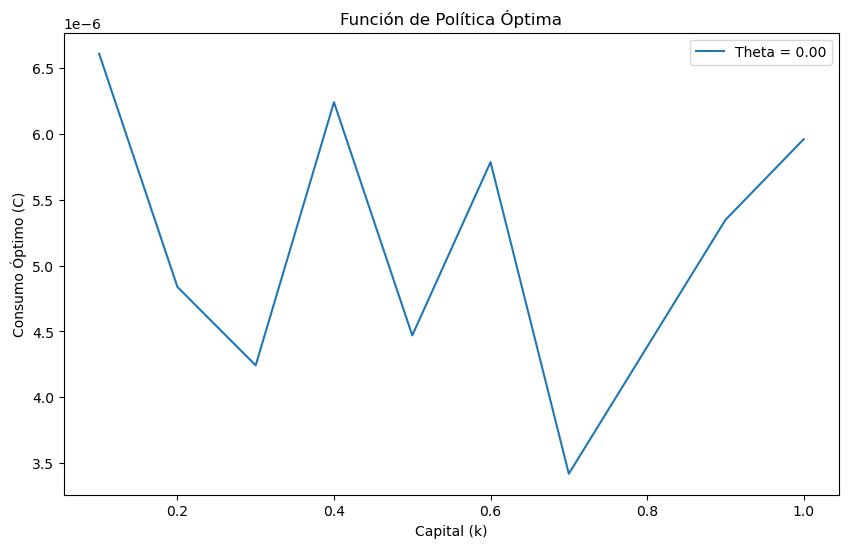

In [22]:
# Graficar la función de política
plt.figure(figsize=(10, 6))
for j in range(num_theta):
    plt.plot(k_grid, policy_function[:, j], label=f'Theta = {theta_grid[j]:.2f}')

plt.title('Función de Política Óptima')
plt.xlabel('Capital (k)')
plt.ylabel('Consumo Óptimo (C)')
plt.legend()
plt.show()
